In [1]:
import numpy as np
import csv
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

# Part 1


|Size |Orbit|habitable | Count|
|-----|-----|----------|------|
|big|near|yes|20|
|big|far|yes|170|
|small|near|yes|139|
|small|far|yes|45|
|big|near|no|130|
|big|far|no|30|
|small|near|no|11|
|small|far|no|255|

In [2]:
tree_data = np.array([[1,0,1,20],
                      [1,1,1,170],
                      [0,0,1,139],
                      [0,1,1,45],
                      [1,0,0,130],
                      [1,1,0,30],
                      [0,0,0,11],
                      [0,1,0,255]
                     ])
def calculate_entropy(data):
    pos_instances = 0
    neg_instances = 0
    for row in data:
        #is habitible
        if(row[-2]==1):
            pos_instances+=row[-1]
        else:
            neg_instances+=row[-1]
    total = pos_instances+neg_instances
    p_p = float(pos_instances)/float(total)
    p_n = float(neg_instances)/float(total)
    return -1.0*p_p*math.log(p_p,2)-1.0*p_n*math.log(p_n,2)
def calculate_gain(row_num,data):
    subset_array = []
    for row in data:
        if(row[row_num]==1):
            subset_array.append(row)
    subset_array = np.array(subset_array)
    #print(subset_array)
    return calculate_entropy(data)-(subset_array.shape[1]/data.shape[1])*\
        calculate_entropy(subset_array)
#def calc_gain(col_num_data):
#    
#print(calculate_entropy(tree_data))

#print(calculate_entropy(tree_data))
#print(calculate_entropy(tree_data))
size_gain = calculate_gain(0,tree_data)
orbit_gain = calculate_gain(1,tree_data)

print("size gain: "+str(size_gain))
print("orbit gain: "+str(orbit_gain))
print("\nOrbit gain is larger therefore subsetting by orbit\n\n")
orbit_far = []
orbit_near = []
for row in tree_data:
    if(row[1]==1):
        orbit_far.append(row)
    else:
        orbit_near.append(row)
orbit_far=np.array(orbit_far)
orbit_near=np.array(orbit_near)
print("Subsetted by far orbit")
print(orbit_far)
print("\nSubsetted by near orbit")
print(orbit_near)

print("\n Working on Far Orbit Branch")
orbit_far_small=[]
orbit_far_big=[]
for row in orbit_far:
    if(row[0]==1):
        orbit_far_big.append(row)
    else:
        orbit_far_small.append(row)
orbit_far_big=np.array(orbit_far_big)
orbit_far_small=np.array(orbit_far_small)
print("\nFar Orbit Big Planet")
print(orbit_far_big)

print("\nFar Orbit Small Planet")
print(orbit_far_small)


print("\n\n Working on Near Orbit Branch")
orbit_near_small=[]
orbit_near_big=[]
for row in orbit_near:
    if(row[0]==1):
        orbit_near_big.append(row)
    else:
        orbit_near_small.append(row)
orbit_near_big=np.array(orbit_near_big)
orbit_near_small=np.array(orbit_near_small)
print("\nNear Orbit Big Planet")
print(orbit_near_big)

print("\nNear Orbit Small Planet")
print(orbit_near_small)




size gain: 0.002256361645689875
orbit gain: 0.011135119828075801

Orbit gain is larger therefore subsetting by orbit


Subsetted by far orbit
[[  1   1   1 170]
 [  0   1   1  45]
 [  1   1   0  30]
 [  0   1   0 255]]

Subsetted by near orbit
[[  1   0   1  20]
 [  0   0   1 139]
 [  1   0   0 130]
 [  0   0   0  11]]

 Working on Far Orbit Branch

Far Orbit Big Planet
[[  1   1   1 170]
 [  1   1   0  30]]

Far Orbit Small Planet
[[  0   1   1  45]
 [  0   1   0 255]]


 Working on Near Orbit Branch

Near Orbit Big Planet
[[  1   0   1  20]
 [  1   0   0 130]]

Near Orbit Small Planet
[[  0   0   1 139]
 [  0   0   0  11]]


# Final Tree
``` 
                            Orbital Radius
                       /                    \
                      /                      \
               Far Orbit                     Near Orbit
               /                               \
              /                                 \
             /                                   \
            /                                     \
           /                                       \
      Size Of Planet                         Size of Planet
      /           \                         /            \
     /             \                       /              \
    /               \                     /                \
 Big Planet    Small Planet          Big Planet       Small Planet
 Habitible      Not Habitible        Not Habitible     Habitible
```

# Part 2
## Describing Data
#### Printing Shape of Imported Data

In [3]:

labels=[]
with open("wine_train_set.csv") as csv_file:
    train_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    labels = train_data.__next__()
print(labels)
my_data = np.loadtxt('wine_train_set.csv', delimiter=',',skiprows=1)
MAX_QUALITY=10
MIN_QUALITY=0
NUM_ATTRIBUTES = len(labels)-1
print(my_data)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.32  0.49 ...  0.34  9.4   5.  ]
 [ 6.4   0.25  0.32 ...  0.58 10.8   7.  ]
 [ 7.7   0.38  0.23 ...  0.41 13.6   6.  ]]


### Showing Histogram of Wine Quality

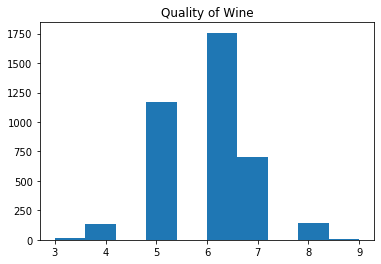

In [4]:
plt.title("Quality of Wine")
plt.hist(my_data[:,-1])
plt.show()

In [5]:
Y_Number=[]
for i in range(0,11):
    Y_Number.append(0)

In [6]:
for row in my_data:
    quality = row[11]
    Y_Number[(int(quality))]+=1
print(Y_Number)

[0, 0, 0, 16, 130, 1166, 1758, 704, 140, 4, 0]


In [7]:
"""Takes array type and returns variance"""
def calculate_variance(data):
    mean = calculate_mean(data)
    sum = 0.0
    for i in data:
        sum+=(float(i)-float(mean))**2.0
    return sum/float(len(data))
"""Takes array type and returns mean"""
def calculate_mean(data):
    sum = 0.0
    for i in data:
        sum+=float(i)
    return sum/float(len(data))

# Calculating Y Priors

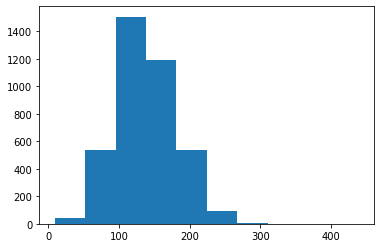

[150. 106. 174. ... 131. 114.  95.]
variance fixed acidity	0.7281495376048622
variance volatile acidity	0.009939864009020012
variance citric acid	0.014644360774123536
variance residual sugar	26.041181904514787
variance chlorides	0.0004568517925278385
variance free sulfur dioxide	292.9602829970729
variance total sulfur dioxide	1801.6978366622886
variance density	9.046107783654085e-06
variance pH	0.02335569577695505
variance sulphates	0.012964421013627847


mean fixed acidity	6.8603241449719246
mean volatile acidity	0.277491066870853
mean citric acid	0.33410413476263084
mean residual sugar	6.423175089331289
mean chlorides	0.04573813169984722
mean free sulfur dioxide	35.4552067381317
mean total sulfur dioxide	138.3843797856049
mean density	0.9940532478305207
mean pH	3.1888386932108124
mean sulphates	0.48909647779479687


In [8]:
#printing variances
plt.hist(my_data[:,6])
plt.show()
print(my_data[:,6])
for i in range(0,10):
    print("variance "+labels[i]+"\t"+str(calculate_variance(my_data[:,i])))
print("\n")
#printing variances
for i in range(0,10):
    print("mean "+labels[i]+"\t"+str(calculate_mean(my_data[:,i])))

In [9]:
def calculate_y_priors(data):
    Y_Prior=[]
    num_samples = data.shape[0]
    for i in range(0,MAX_QUALITY):
        Y_Prior.append(0)
    print("## B: ")
    for i in range(0,MAX_QUALITY):
        Y_Prior[i]=Y_Number[i]/num_samples
    return Y_Prior
y_prior = calculate_y_priors(my_data)
for i in range(0,len(y_prior)):
    print("Y prior "+str(labels[i])+": "+ str(y_prior[i]))


## B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426


# Filter data to make calculating mean+standard deviation easy

In [10]:
# Returns data sorted by quality
# output: filtered_data[Quality][xi][entry]
def filter_data_by_quality(data):
    out_list = []
    for i in range(MIN_QUALITY,MAX_QUALITY+1):
        out_list.append(np.array([]))
    #print(data)
    #for i in range(MIN_QUALITY,MAX_QUALITY+1):
    #    out_list.append(np.array([]))
    
    for quality in range(MIN_QUALITY,MAX_QUALITY+1):
        for row in data:
            #print(row)       
            if(row[-1]==quality):
                try:
                    #print(row[:-1])
                    out_list[quality] = np.vstack((out_list[quality],row))
                except:
                    out_list[quality] = row
                #out_list[quality].append(row[:-1])
                
    return out_list
#print(filter_data_by_quality(my_data))

# Calculating posteriors

In [11]:

"""Runs fn on result of filtered data"""
def run_on_data(data,fn):
    out = []
    for quality in data:
        to_append = np.array([])
        #transposing data to get column
        for col in quality.T:
            #print("")
            #print(col)
            to_append=np.hstack((to_append,fn(col)))
        out.append(to_append)
    return out

In [12]:
#filtered_data = filter_data_by_quality(my_data)
#variance = run_on_data(filtered_data,calculate_variance)
#mean = run_on_data(filtered_data,calculate_mean)
#print("VARIANCE")
#print(variance)
#print("MEAN")
#print(mean)

In [13]:
# calculating probabilities
#print(mean)
#print(prob)
#gen
#prob=[]
def get_prob_given_quality(variance,mean,xi,quality,number):
    assert(type(xi)==int)
    assert(type(quality)==int)
    first_half = (math.sqrt(2.0*math.pi*variance[quality][xi]))
    in_exp = (number-mean[quality][xi])/variance[quality][xi]
    in_exp = -0.5*(in_exp**2)
    
    return math.exp(in_exp)/first_half

# 2d getting probabilities for quality=4

In [14]:
# 2e Evaluate Model
def eval_model(data_in,labels):
    filtered_data = filter_data_by_quality(data_in)
    variance_given_k = run_on_data(filtered_data,calculate_variance)
    mean_given_k = run_on_data(filtered_data,calculate_mean)
    #print(mean_given_k)
    variance = []
    mean = []
    probs = []
    
    for col in data_in.T[:-1]:
        variance.append(calculate_variance(col))
        mean.append(calculate_mean(col))
    print(mean)
    #print(data_in)
    #print(variance)
    correct = 0
    total = 0
    y_priors = calculate_y_priors(data_in)
    print("2B: ")
    i=0
    for y in y_priors:
        print("Y prior "+str(labels[i])+": "+ str(y_prior[i]))
        i+=1
    num_prints=0
    num_prints_b=0
    printed_2c=False
    printed_2d=False
    for row in data_in:
        p_x_g = []
        p_x=[]
        for x in range(0,row.shape[0]-1):
            p_x_g.append(get_prob_given_quality(
                variance_given_k,mean_given_k,
                x,int(row[-1]),row[x]))
            #print(p_x_g[-1])
            first_half = (math.sqrt(2.0*math.pi*variance[x]))
            in_exp = (row[x]-mean[x])/variance[x]
            in_exp = -0.5*(in_exp**2)
    
            p_x.append(math.exp(in_exp)/first_half)
            #print(p_x[-1])
        #evaluating model
        top = 1.0
        i=0
        if(printed_2c==False):
            print("2C: ")
            printed_2c=True
        for prob in p_x_g:
            if(num_prints<NUM_ATTRIBUTES):
                print("Probability of "+labels[i]+" given K: "+str(prob))
            #if(prob>1.0):
            #    print("prob_x_g to big")
            #    print(prob)
            top*=prob
            i+=1
            num_prints+=1
        bottom =1.0
        i=0
        if(printed_2d==False):
            print("2D: ")
            printed_2d=True
        for prob in p_x:
            if(num_prints_b<NUM_ATTRIBUTES):
                print("Probability of "+labels[i]+": "+str(prob))
            #if(prob>1.0):
            #    print("prob to big")
            #    print(prob)
            i+=1
            num_prints_b+=1
            bottom*=prob
        try:    
            probs.append((top*y_priors[int(row[-1])])/bottom)
        except:
            probs.append(0.0)
    #print(probs)
    print("2E: evaluation of model")
    print("max probability: "+str(max(probs)))
    print("min probability: "+str(min(probs)))
    print("variance of probability: "+str(calculate_variance(probs)))
eval_model(my_data,labels)
    

[6.8603241449719246, 0.277491066870853, 0.33410413476263084, 6.423175089331289, 0.04573813169984722, 35.4552067381317, 138.3843797856049, 0.9940532478305207, 3.1888386932108124, 0.48909647779479687, 10.506281265949005]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.06612097981293205
Probability of volatile acidity given K: 6.862815615894362e-09
Probability of citric acid given K: 1.1703242997220376e-38
Probability of residual sugar given K: 0.09224545463066952
Probability of chlorides given K: 0.0
Probability of free sulfur dioxide given K: 0.030452376590475005
Probability of total sulfur dioxide given K: 0.

# 2F Removing Citric Acid
I am removing citric acid because it may be corrrelated to the acidity of the wine.

In [15]:
edited_data = np.hstack((my_data[:,0:1],my_data[:,2:]))
edited_labels = labels.copy()
edited_labels.pop(2)
foo=5 #stopping 
eval_model(edited_data,edited_labels)

[6.8603241449719246, 0.33410413476263084, 6.423175089331289, 0.04573813169984722, 35.4552067381317, 138.3843797856049, 0.9940532478305207, 3.1888386932108124, 0.48909647779479687, 10.506281265949005]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior residual sugar: 0.0
Y prior chlorides: 0.00408371618172537
Y prior free sulfur dioxide: 0.033180193976518634
Y prior total sulfur dioxide: 0.29760081674323635
Y prior density: 0.44869831546707506
Y prior pH: 0.17968351199591628
Y prior sulphates: 0.03573251659009699
Y prior alcohol: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.06612097981293205
Probability of volatile acidity given K: 1.1703242997220376e-38
Probability of residual sugar given K: 0.09224545463066952
Probability of chlorides given K: 0.0
Probability of free sulfur dioxide given K: 0.030452376590475005
Probability of total sulfur dioxide given K: 0.012049031150111236
Probability of density given K: 0.0
Probability of pH given K:

# 2G Evaluating on Test Data

In [16]:
train_labels = []
with open("wine_train_set.csv") as csv_file:
    train_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    train_labels = train_data.__next__()
train_data = np.loadtxt('wine_train_set.csv', delimiter=',',skiprows=1)
eval_model(train_data,train_labels)

[6.8603241449719246, 0.277491066870853, 0.33410413476263084, 6.423175089331289, 0.04573813169984722, 35.4552067381317, 138.3843797856049, 0.9940532478305207, 3.1888386932108124, 0.48909647779479687, 10.506281265949005]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.06612097981293205
Probability of volatile acidity given K: 6.862815615894362e-09
Probability of citric acid given K: 1.1703242997220376e-38
Probability of residual sugar given K: 0.09224545463066952
Probability of chlorides given K: 0.0
Probability of free sulfur dioxide given K: 0.030452376590475005
Probability of total sulfur dioxide given K: 0.

Currently the results show a very high maximum probability. This is likely caused by a bug in the code. 

# 2H: Selecting first 1000 and 100 Elements from the training set and viewing results

In [17]:
thousand_data = my_data[0:1000]
eval_model(thousand_data,labels)
hundred_data = my_data[0:100]
eval_model(hundred_data,labels)

[6.845199999999998, 0.2755700000000003, 0.3367800000000001, 6.419450000000001, 0.04538499999999987, 35.592, 137.2535, 0.9940491099999996, 3.1919399999999993, 0.49193000000000026, 10.514783333322988]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.10602609443303967
Probability of volatile acidity given K: 6.439313038321531e-10
Probability of citric acid given K: 2.454087777107941e-56
Probability of residual sugar given K: 0.09357203077350056
Probability of chlorides given K: 0.0
Probability of free sulfur dioxide given K: 0.02991600505796787
Probability of total sulfur dioxide given K: 0.011674214734554088
Pro